### U.S. Partisan Division on Government Regulations on Technology
#### The original dataset and research can be accessed from the [Pew Research Center](https://www.pewresearch.org/internet/2022/03/17/ai-and-human-enhancement-americans-openness-is-tempered-by-a-range-of-concerns/). 

#### My final work still has some minor differences from the original research even after having reviewed my data processing operations and calculations. This may be due to my different approaches to dealing with categorical variables and non-available values from the original research or certain data have been editted on purpose before being made available to the public. 

#### However, the purpose of the work is to showcase my data processing and visualisation skills instead of replicating the original study based on a rigorous academic standard. Therefore, I consider some result differences acceptable in my case of this data visualisation replication work.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#import the dataset
data = pd.read_spss('Data/ATP_W99.sav')

In [3]:
#select relevat columns
by_party_attitude_gov = data[['F_PARTYSUM_FINAL', 'DCARS9_W99', 'SMALG8_W99', 'FACEREC7_W99', 'GENEV10_W99', 'BCHIP11_W99', 'EXOV9_W99']]

In [4]:
#transform the table
by_party_attitude_gov = by_party_attitude_gov.melt(id_vars='F_PARTYSUM_FINAL', value_vars=['DCARS9_W99', 'SMALG8_W99', 'FACEREC7_W99', 'GENEV10_W99', 'BCHIP11_W99', 'EXOV9_W99'], var_name='Issue', value_name='Response')
by_party_attitude_gov['Response'] = by_party_attitude_gov['Response'].str.replace('their', 'its')

In [5]:
#calculate the proportions
by_party_proportion = by_party_attitude_gov.groupby(['F_PARTYSUM_FINAL', 'Issue'])['Response'].value_counts(normalize = True).rename('Proportion').reset_index()

In [6]:
#process the data for rep
rep = by_party_proportion[by_party_proportion['F_PARTYSUM_FINAL'].str.contains('Rep')]
rep['Proportion'] = round(rep['Proportion']*100)
rep = rep.pivot(index = 'Issue', columns='Response', values = 'Proportion').reset_index()
rep.rename_axis(None, axis = 1, inplace=True)
rep

,Issue,Government will go too far regulating its use,Government will not go far enough regulating its use,Refused
0,BCHIP11_W99,62.0,36.0,2.0
1,DCARS9_W99,61.0,37.0,2.0
2,EXOV9_W99,69.0,29.0,3.0
3,FACEREC7_W99,60.0,39.0,2.0
4,GENEV10_W99,62.0,36.0,2.0
5,SMALG8_W99,54.0,43.0,3.0


In [7]:
#process the data for dem
dem = by_party_proportion[by_party_proportion['F_PARTYSUM_FINAL'].str.contains('Dem')]
dem['Proportion'] = round(dem['Proportion']*100)
dem = dem.pivot(index = 'Issue', columns='Response', values = 'Proportion').reset_index()
dem.rename_axis(None, axis = 1, inplace=True)
dem

,Issue,Government will go too far regulating its use,Government will not go far enough regulating its use,Refused
0,BCHIP11_W99,29.0,70.0,2.0
1,DCARS9_W99,25.0,73.0,2.0
2,EXOV9_W99,29.0,69.0,2.0
3,FACEREC7_W99,31.0,67.0,2.0
4,GENEV10_W99,30.0,68.0,2.0
5,SMALG8_W99,30.0,68.0,2.0


In [8]:
#process the data for average US adults
adult_average = by_party_attitude_gov.groupby('Issue')['Response'].value_counts(normalize = True).rename('Proportion').reset_index()
adult_average['Proportion'] =round(adult_average['Proportion']*100)
adult_average = adult_average.pivot(index = 'Issue', columns = 'Response', values = 'Proportion').reset_index()
adult_average.rename_axis(None, axis = 1, inplace=True)
adult_average

,Issue,Government will go too far regulating its use,Government will not go far enough regulating its use,Refused
0,BCHIP11_W99,45.0,53.0,2.0
1,DCARS9_W99,42.0,55.0,2.0
2,EXOV9_W99,49.0,49.0,3.0
3,FACEREC7_W99,45.0,53.0,2.0
4,GENEV10_W99,46.0,52.0,2.0
5,SMALG8_W99,42.0,55.0,3.0


In [9]:
issue_order = ['EXOV9_W99', 'BCHIP11_W99', 'GENEV10_W99', 'FACEREC7_W99', 'SMALG8_W99', 'DCARS9_W99']

rep = rep.set_index('Issue').reindex(issue_order).reset_index()
dem = dem.set_index('Issue').reindex(issue_order).reset_index()
adult_average = adult_average.set_index('Issue').reindex(issue_order).reset_index()

In [10]:
#the y-coordinates for rep and dem
y_dem = np.arange(-0.25, 5, 1)
y_rep = np.arange(-0.5, 5, 1)

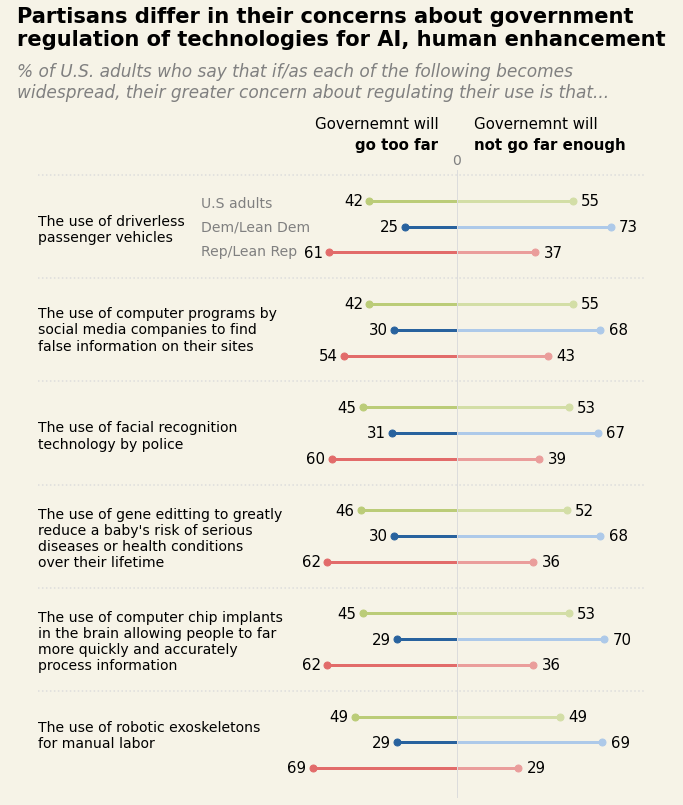

In [11]:
fig = plt.figure(figsize = (12, 12))

#add the stem lines for average adults
markerline1, stemline1, baseline1 = plt.stem(-adult_average['Government will go too far regulating its use'], orientation = 'horizontal', linefmt = '#bbcc78')
plt.setp(stemline1, 'linewidth', 3)
plt.setp(markerline1, 'markersize', 7, color = '#bbcc78')

markerline2, stemline2, baseline2 = plt.stem(adult_average['Government will not go far enough regulating its use'], orientation = 'horizontal', linefmt = '#d3dea6')
plt.setp(stemline2, 'linewidth', 3)
plt.setp(markerline2, 'markersize', 7, color = '#d3dea6')

#add the stem lines for dem
markerline3, stemline3, baseline3 = plt.stem(y_dem, -dem['Government will go too far regulating its use'], orientation = 'horizontal', linefmt = '#28629e')
plt.setp(stemline3, 'linewidth', 3)
plt.setp(markerline3, 'markersize', 7, color = '#28629e')

markerline4, stemline4, baseline4 = plt.stem(y_dem, dem['Government will not go far enough regulating its use'], orientation = 'horizontal', linefmt = '#adc9e9')
plt.setp(stemline4, 'linewidth', 3)
plt.setp(markerline4, 'markersize', 7, color = '#adc9e9')

#add the stem lines for rep
markerline5, stemline5, baseline5 = plt.stem(y_rep, -rep['Government will go too far regulating its use'], orientation = 'horizontal', linefmt = '#e26b6a')
plt.setp(stemline5, 'linewidth', 3)
plt.setp(markerline5, 'markersize', 7, color = '#e26b6a')

markerline6, stemline6, baseline6 = plt.stem(y_rep, rep['Government will not go far enough regulating its use'], orientation = 'horizontal', linefmt = '#ea9d9b')
plt.setp(stemline6, 'linewidth', 3)
plt.setp(markerline6, 'markersize', 7, color = '#ea9d9b')

#change the base line length and color
for baseline in [baseline1, baseline2, baseline3, baseline4, baseline5, baseline6]:
    plt.setp(baseline, color = '#dcdcdc', linewidth = 1)
    baseline.set_ydata([-0.8, 5.3])

#add text annotations for the %
for x, y, t in zip(-adult_average['Government will go too far regulating its use'] - 12, list(np.arange(-0.05, 5.8, 1)), adult_average['Government will go too far regulating its use']):
    plt.text(x = x, y = y, s = int(t), fontsize = 15)

for x, y, t in zip(adult_average['Government will not go far enough regulating its use'] + 4, list(np.arange(-0.05, 5.8, 1)), adult_average['Government will not go far enough regulating its use']):
    plt.text(x = x, y = y, s = int(t), fontsize = 15)

for x, y, t in zip(-dem['Government will go too far regulating its use'] - 12, list(np.arange(-0.3, 5.8, 1)), dem['Government will go too far regulating its use']):
    plt.text(x = x, y = y, s = int(t), fontsize = 15)

for x, y, t in zip(dem['Government will not go far enough regulating its use'] + 4, list(np.arange(-0.3, 5.8, 1)), dem['Government will not go far enough regulating its use']):
    plt.text(x = x, y = y, s = int(t), fontsize = 15)

for x, y, t in zip(-rep['Government will go too far regulating its use'] - 12, list(np.arange(-0.55, 5.8, 1)), rep['Government will go too far regulating its use']):
    plt.text(x = x, y = y, s = int(t), fontsize = 15)

for x, y, t in zip(rep['Government will not go far enough regulating its use'] + 4, list(np.arange(-0.55, 5.8, 1)), rep['Government will not go far enough regulating its use']):
    plt.text(x = x, y = y, s = int(t), fontsize = 15)

#add the verticle line that represents 0
for i in list(np.arange(0.25, 6, 1)):
    plt.hlines(y = i, xmin = -200, xmax = 90, color = '#dcdcdc', linestyles = 'dotted')

plt.text(-2.5, 5.35, '0', color = 'gray', size = 14)

#add text annotations for issues
plt.text(-200, 4.6, 'The use of driverless\npassenger vehicles', size = 14)
plt.text(-200, 3.55, 'The use of computer programs by\nsocial media companies to find\nfalse information on their sites', size = 14)
plt.text(-200, 2.6, 'The use of facial recognition\ntechnology by police', size = 14)
plt.text(-200, 1.45, "The use of gene editting to greatly\nreduce a baby's risk of serious\ndiseases or health conditions\nover their lifetime", size = 14)
plt.text(-200, 0.45, "The use of computer chip implants\nin the brain allowing people to far\nmore quickly and accurately\nprocess information", size = 14)
plt.text(-200, -0.3, 'The use of robotic exoskeletons\nfor manual labor', size = 14)

#add text annotation for the legend
plt.text(-122, 4.93, 'U.S adults', size = 14, color = 'gray')
plt.text(-122, 4.71, 'Dem/Lean Dem', size = 14, color = 'gray')
plt.text(-122, 4.47, 'Rep/Lean Rep', size = 14, color = 'gray')

plt.text(-68, 5.7, 'Governemnt will', size = 15)
plt.text(-49, 5.5, 'go too far', size = 15, weight = 'bold')

plt.text(8, 5.7, 'Governemnt will', size = 15)
plt.text(8, 5.5, 'not go far enough', size = 15, weight = 'bold')

#add the title and the subtitle
plt.text(-210, 6.5, 'Partisans differ in their concerns about government\nregulation of technologies for AI, human enhancement', weight = 'bold', size = 21)
plt.text(-210, 6, '% of U.S. adults who say that if/as each of the following becomes\nwidespread, their greater concern about regulating their use is that...', fontstyle = 'italic', size = 17, color = 'gray')

#remove unnecessary elements
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)

#change the background color
ax.set_facecolor('#f6f3e7')
plt.gcf().set_facecolor('#f6f3e7')

plt.tight_layout()

plt.show()
